In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_text = pd.read_csv('training_text.csv',delimiter='\|\|',encoding='utf-8',index_col = None,skiprows=1,names = ['ID','text'])
train_v = pd.read_csv('training_variants.csv', index_col = None)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [3]:
test_text = pd.read_csv('test_text.csv',delimiter='\|\|',index_col = None,skiprows=1,names = ['ID','text'])
test_v = pd.read_csv('test_variants.csv', index_col = None)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [4]:
merged_train = pd.merge(train_v,train_text, on = ['ID'])

In [5]:
merged_train['text_freq'] = merged_train.groupby('text')['text'].transform('count')

In [6]:
merged_test = pd.merge(test_v,test_text, on=['ID'])

In [7]:
merged_test['text_freq'] = merged_test.groupby('text')['text'].transform('count')

In [8]:
def gene_count(df):
    g = []
    for row in df:
        n = row['text'].count(row['Gene'])
        g.append(n)
    df['gene_count'] = g
    return df

In [9]:
merged_train.loc[:, 'gene_count']  = merged_train.apply(lambda row: row['text'].count(row['Gene']), axis = 1)

In [10]:
merged_test.loc[:, 'gene_count']  = merged_test.apply(lambda row: row['text'].count(row['Gene']), axis = 1)

In [11]:
# function to count frequency of words in each row
def word_count(df, words):    
    for word in words:
        w =[]
        for row in df['text']:
            n = row.lower().count(word)
            w.append(n)
        df[word] = w
    return df

In [39]:
#words = ['cancer','mutation','breast cancer']

In [40]:
#sns.pairplot(w[['Class','cancer','mutation','breast cancer']], hue="Class")


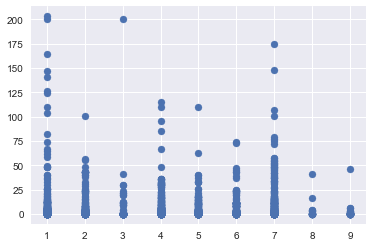

In [141]:
#plt.scatter(w['Class'],w['breast cancer'])

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(list(merged_train['text']))
frequencies = sum(sparse_matrix).toarray()[0]
f = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [17]:
f.reset_index(inplace = True)
f.sort_values('frequency', ascending = False,inplace= True)

In [18]:
f[:200]

,index,frequency
141067,the,1518614
105174,of,1248692
25371,and,938018
78908,in,920118
142705,to,568955
152115,with,390281
141012,that,291448
62357,for,277303
151603,were,261898
98884,mutations,238152


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(list(merged_train['text']))
frequencies = sum(sparse_matrix).toarray()[0]
h = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [23]:
h.reset_index(inplace = True)
h.sort_values('frequency',ascending = False, inplace = True)

In [24]:
h[:200]

,index,frequency
1421890,of the,250499
1055660,in the,176646
778630,et al,103515
2005058,to the,71646
2141950,wild type,56323
2154726,with the,55196
324113,and the,53191
1332618,mutations in,50388
866085,for the,42131
1935362,that the,39215


In [12]:
words = 'mutat, cancer, patient, protein, express, tumor, variant, kinase, domain, brca1, egfr, activation, ras, p53, exon, growth, clinical, signaling, function, pten, phospharylation, residue, resistance, raf, pathway, alk, disease, receptor, missense, breast, braf, inhibit, lung, tyrosine, acid, induce, survival, proliferation, akt, imatinib, fusion, oncogenic, transcription, deleterous, flt3, melanoma, somatic, gefitinib, brct, myc, amplification, genomic, pathogenic, benign, p21, phosphatase, sp3b1, bat3'.split(', ')

In [13]:
merged_train.columns

Index(['ID', 'Gene', 'Variation', 'Class', 'text', 'text_freq', 'gene_count'], dtype='object')

In [14]:
m_words = 'mutat, cell, activ, express, mutant, protein, tumor, cancer, use, patient, figur, fig, et, al, gene, variant, domain, type, function, brca, kinas, result, bind, studi, also, sequenc, data, assay, analysi, line'.split(', ')

In [14]:
merged_train_text = word_count(merged_train, words)

In [15]:
merged_test_text = word_count(merged_test, words)

In [16]:
train_bg = pd.read_csv('train_bg.csv')
test_bg = pd.read_csv('test_bg.csv')

In [18]:
merged_train_bg = pd.merge(train_bg,merged_train_text, on = ['ID'])
merged_test_bg = pd.merge(test_bg, merged_test_text, on=['ID'])

In [19]:
merged_train_bg.columns

Index(['Unnamed: 0', 'ID', 'Gene_x', 'Variation_x', 'Class_x', 'Text',
       'Word_count', 'Variation_recoded', 'TP53', 'EGFR', 'BRCA1', 'BRCA2',
       'PTEN', 'BCOR', 'SF3B1', 'Gene_y', 'Variation_y', 'Class_y', 'text',
       'text_freq', 'gene_count', 'mutat', 'cancer', 'patient', 'protein',
       'express', 'tumor', 'variant', 'kinase', 'domain', 'brca1', 'egfr',
       'activation', 'ras', 'p53', 'exon', 'growth', 'clinical', 'signaling',
       'function', 'pten', 'phospharylation', 'residue', 'resistance', 'raf',
       'pathway', 'alk', 'disease', 'receptor', 'missense', 'breast', 'braf',
       'inhibit', 'lung', 'tyrosine', 'acid', 'induce', 'survival',
       'proliferation', 'akt', 'imatinib', 'fusion', 'oncogenic',
       'transcription', 'deleterous', 'flt3', 'melanoma', 'somatic',
       'gefitinib', 'brct', 'myc', 'amplification', 'genomic', 'pathogenic',
       'benign', 'p21', 'phosphatase', 'sp3b1', 'bat3'],
      dtype='object')

In [20]:
merged_test_bg.columns

Index(['Unnamed: 0', 'ID', 'Gene_x', 'Variation_x', 'Text', 'Word_count',
       'Variation_recoded', 'TP53', 'EGFR', 'BRCA1', 'BRCA2', 'PTEN', 'BCOR',
       'SF3B1', 'Gene_y', 'Variation_y', 'text', 'text_freq', 'gene_count',
       'mutat', 'cancer', 'patient', 'protein', 'express', 'tumor', 'variant',
       'kinase', 'domain', 'brca1', 'egfr', 'activation', 'ras', 'p53', 'exon',
       'growth', 'clinical', 'signaling', 'function', 'pten',
       'phospharylation', 'residue', 'resistance', 'raf', 'pathway', 'alk',
       'disease', 'receptor', 'missense', 'breast', 'braf', 'inhibit', 'lung',
       'tyrosine', 'acid', 'induce', 'survival', 'proliferation', 'akt',
       'imatinib', 'fusion', 'oncogenic', 'transcription', 'deleterous',
       'flt3', 'melanoma', 'somatic', 'gefitinib', 'brct', 'myc',
       'amplification', 'genomic', 'pathogenic', 'benign', 'p21',
       'phosphatase', 'sp3b1', 'bat3'],
      dtype='object')

In [21]:
y_train = merged_train_bg['Class_x']

In [22]:
del merged_train_bg['Class_x']
del merged_train_bg['Class_y']

In [23]:
all_data = merged_train_bg.append(merged_test_bg)

In [39]:
all_data.columns

Index(['Word_count', 'Variation_recoded', 'text_freq', 'gene_count', 'mutat',
       'cancer', 'patient', 'protein', 'express', 'tumor', 'variant', 'kinase',
       'domain', 'brca1', 'egfr', 'activation', 'ras', 'p53', 'exon', 'growth',
       'clinical', 'signaling', 'function', 'pten', 'phospharylation',
       'residue', 'resistance', 'raf', 'pathway', 'alk', 'disease', 'receptor',
       'missense', 'breast', 'braf', 'inhibit', 'lung', 'tyrosine', 'acid',
       'induce', 'survival', 'proliferation', 'akt', 'imatinib', 'fusion',
       'oncogenic', 'transcription', 'deleterous', 'flt3', 'melanoma',
       'somatic', 'gefitinib', 'brct', 'myc', 'amplification', 'genomic',
       'pathogenic', 'benign', 'p21', 'phosphatase', 'sp3b1', 'bat3'],
      dtype='object')

In [40]:
all_data.head(1)

,Word_count,Variation_recoded,text_freq,gene_count,mutat,cancer,patient,protein,express,tumor,...,brct,myc,amplification,genomic,pathogenic,benign,p21,phosphatase,sp3b1,bat3
0,6089,Truncation,1,34,25,12,13,64,77,4,...,0,17,0,3,0,0,1,0,0,0


In [26]:
delete = ['Unnamed: 0','ID','Text','text','Gene_x','Gene_y','Variation_x','Variation_y','TP53','EGFR','BRCA1','BRCA2','PTEN','BCOR','SF3B1'] 

In [27]:
for c in delete:
    del all_data[c]

In [28]:
all_data.head()

,Word_count,Variation_recoded,text_freq,gene_count,mutat,cancer,patient,protein,express,tumor,...,brct,myc,amplification,genomic,pathogenic,benign,p21,phosphatase,sp3b1,bat3
0,6089,Truncation,1,34,25,12,13,64,77,4,...,0,17,0,3,0,0,1,0,0,0
1,5756,Substitution,2,163,117,46,30,12,15,27,...,0,3,0,5,0,0,0,0,0,0
2,5756,NeuNeg,2,163,117,46,30,12,15,27,...,0,3,0,5,0,0,0,0,0,0
3,5572,NeuNeg,4,117,116,2,16,4,14,0,...,0,0,3,0,1,0,0,0,0,0
4,6202,NeuNeu,8,197,171,71,5,52,4,10,...,0,1,0,1,0,5,0,0,0,0


In [29]:
all_dummies = pd.get_dummies(all_data,columns = ['Variation_recoded'])

In [30]:
all_dummies.shape

(8989, 117)

In [31]:
train = all_dummies.iloc[:3321]
test = all_dummies.iloc[3321:]

In [32]:
all_dummies.columns

Index(['Word_count', 'text_freq', 'gene_count', 'mutat', 'cancer', 'patient',
       'protein', 'express', 'tumor', 'variant',
       ...
       'Variation_recoded_Wildtype', 'Variation_recoded_X1006_splice',
       'Variation_recoded_X1007_splice', 'Variation_recoded_X1008_splice',
       'Variation_recoded_X1009_splice', 'Variation_recoded_X434_splice',
       'Variation_recoded_X475_splice', 'Variation_recoded_X582_splice',
       'Variation_recoded_X963_splice', 'Variation_recoded_p61BRAF'],
      dtype='object', length=117)

In [33]:
train.shape
test.shape

(5668, 117)

In [ ]:
del merged_train_bg['Gene']

In [172]:
train_dummie = pd.get_dummies(merged_train_bg,columns = ['Variation_recoded'])

In [173]:
#del train_dummie['ID']

In [174]:
#train_dummie.head()

,Word_count,Class,text_freq,mutat,cancer,patient,protein,express,tumor,variant,...,Variation_recoded_Truncation,Variation_recoded_Wildtype,Variation_recoded_X1007_splice,Variation_recoded_X1008_splice,Variation_recoded_X1009_splice,Variation_recoded_X434_splice,Variation_recoded_X475_splice,Variation_recoded_X582_splice,Variation_recoded_X963_splice,Variation_recoded_p61BRAF
0,6089,1,1,25,12,13,64,77,4,0,...,1,0,0,0,0,0,0,0,0,0
1,5756,2,2,117,46,30,12,15,27,0,...,0,0,0,0,0,0,0,0,0,0
2,5756,2,2,117,46,30,12,15,27,0,...,0,0,0,0,0,0,0,0,0,0
3,5572,3,4,116,2,16,4,14,0,13,...,0,0,0,0,0,0,0,0,0,0
4,6202,4,8,171,71,5,52,4,10,2,...,0,0,0,0,0,0,0,0,0,0


In [175]:
#y_train = train_dummie['Class']

In [35]:
y_train_dummie = y_train-1

In [177]:
del train_dummie['Class']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train,y_train_dummie,test_size=0.20, 
                                                    random_state=30,stratify=y_train_dummie)

In [42]:
import xgboost as xgb
dtrain1 = xgb.DMatrix(x_train, y_train,feature_names=x_train.columns.values)
dtrain = xgb.DMatrix(train, y_train_dummie,feature_names=x_train.columns.values)
dtest1 = xgb.DMatrix(x_test,y_test,feature_names = x_test.columns.values)


In [43]:
y_train_dummie.head()

0    0
1    1
2    1
3    2
4    3
Name: Class_x, dtype: int64

[0]	train-mlogloss:2.14163	test-mlogloss:2.15425
[50]	train-mlogloss:1.05729	test-mlogloss:1.45737
[100]	train-mlogloss:0.746984	test-mlogloss:1.36646
[150]	train-mlogloss:0.577585	test-mlogloss:1.36076


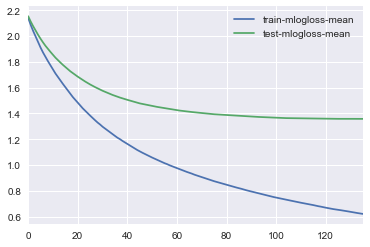

In [128]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'min_child_weight': 1,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'silent': 0,
    'num_class':9
}

cv_output = xgb.cv(xgb_params, dtrain1, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
cv_output[['train-mlogloss-mean', 'test-mlogloss-mean']].plot()

In [145]:
model_1 = xgb.train(xgb_params, dtrain, num_boost_round=150)

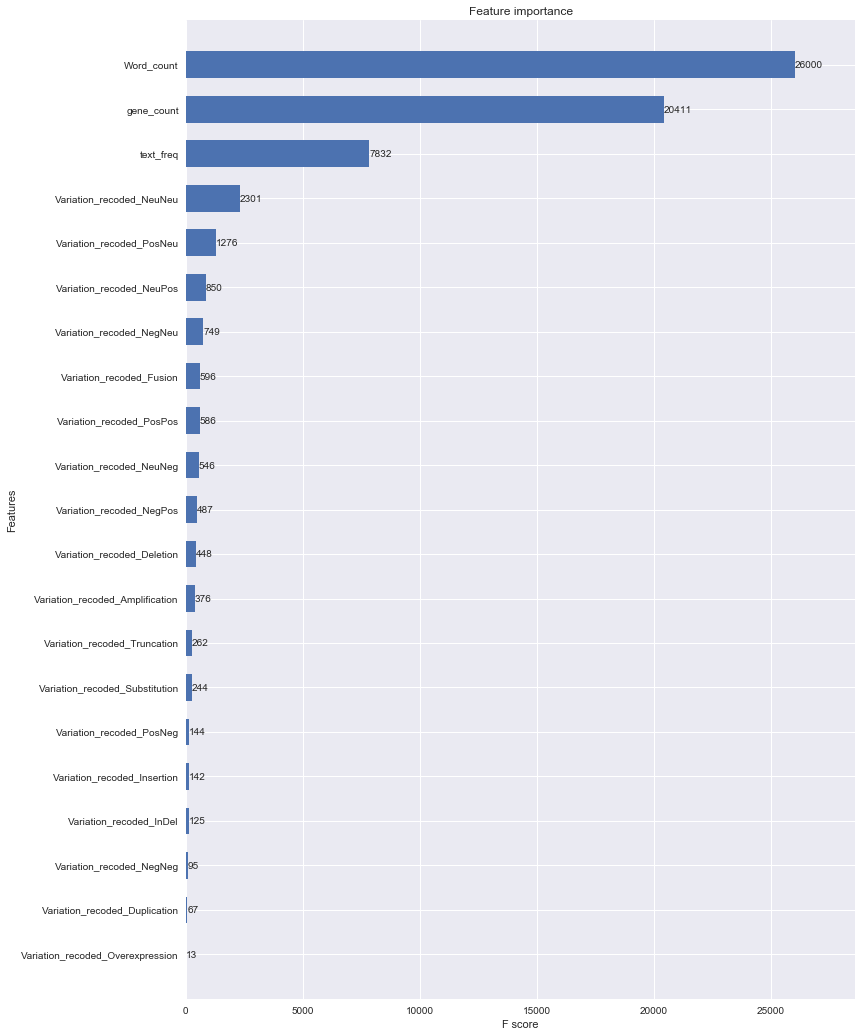

In [146]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model_1,height=0.6, ax=ax)

In [68]:
from sklearn.grid_search import GridSearchCV 
from xgboost.sklearn import XGBClassifier
param_test1 = {
 'max_depth':list(range(4,12,2)),
 'min_child_weight':list(range(1,6,2)),
    'subsample':[0.6,0.7,0.8,0.9,1],
    'colsample_bytree':[0.6,0.7,0.8,0.9,1]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.05, n_estimators=10, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.7, colsample_bytree=0.7,
 objective= 'multi:softprob', scale_pos_weight=1, seed=27), 
 param_grid = param_test1,scoring='neg_log_loss', iid=False, cv=5)
gsearch1.fit(train, y_train_dummie)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -1.84466, std: 0.05610, params: {'subsample': 0.6, 'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_weight': 1},
  mean: -1.84751, std: 0.05127, params: {'subsample': 0.7, 'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_weight': 1},
  mean: -1.84531, std: 0.04828, params: {'subsample': 0.8, 'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_weight': 1},
  mean: -1.84788, std: 0.05392, params: {'subsample': 0.9, 'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_weight': 1},
  mean: -1.84636, std: 0.05608, params: {'subsample': 1, 'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_weight': 1},
  mean: -1.84730, std: 0.05436, params: {'subsample': 0.6, 'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_weight': 3},
  mean: -1.85053, std: 0.04923, params: {'subsample': 0.7, 'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_weight': 3},
  mean: -1.84513, std: 0.04740, params: {'subsample': 0.8, 'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_weight': 3},
  mean: -1

In [71]:
params1 =  {'subsample': 1, 'colsample_bytree': 0.9, 'max_depth': 8, 'min_child_weight': 5,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss'}
params2= {'subsample': 1, 'colsample_bytree': 0.9, 'max_depth': 6, 'min_child_weight': 3,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss'}
params3 =  {'subsample': 1, 'colsample_bytree': 0.9, 'max_depth': 6, 'min_child_weight': 1,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss'}
params4 =  {'subsample': 1, 'colsample_bytree': 0.7, 'max_depth': 6, 'min_child_weight': 1,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss'}
params5 =  {'subsample': 1, 'colsample_bytree': 0.9, 'max_depth': 10, 'min_child_weight': 5,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss'}
params6 = {'subsample': 1, 'colsample_bytree': 0.9, 'max_depth': 6, 'min_child_weight': 5,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss'}
params7 =  {'subsample': 1, 'colsample_bytree': 0.8, 'max_depth': 6, 'min_child_weight': 3,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss'}
params8 =  {'subsample': 1, 'colsample_bytree': 0.6, 'max_depth': 8, 'min_child_weight': 5,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss'}
params9 =  {'subsample': 1, 'colsample_bytree': 0.8, 'max_depth': 6, 'min_child_weight': 1,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss'}
params10 =  {'subsample': 1, 'colsample_bytree': 0.6, 'max_depth': 10, 'min_child_weight': 5,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss'}

bst1 = xgb.train(param1, dtrain, num_round)
bst2 = xgb.train(param2, dtrain, num_round)
bst3 = xgb.train(param3, dtrain, num_round) 
bst4 = xgb.train(param4, dtrain, num_round)
bst5 = xgb.train(param5, dtrain, num_round)
bst6 = xgb.train(param6, dtrain, num_round)
bst7 = xgb.train(param7, dtrain, num_round)
bst8 = xgb.train(param8, dtrain, num_round)
bst9 = xgb.train(param9, dtrain, num_round)
bst10 = xgb.train(param10, dtrain, num_round)

ypred_submit = (bst1.predict(dtest) + bst2.predict(dtest) + bst3.predict(dtest) +  bst4.predict(dtest) +  bst5.predict(dtest)
               + bst6.predict(dtest)+bst7.predict(dtest)+bst8.predict(dtest)+bst9.predict(dtest)+bst10.predict(dtest))/10

In [62]:
num_round = 60
param1 = {'max_depth':7, 'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':0.75,'colsample_bytree':0.85}

param2 = {'max_depth':6, 'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':0.85,'colsample_bytree':0.75}

param3 = {'max_depth':8, 'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':0.65,'colsample_bytree':0.75}

param4 = {'max_depth':9, 'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':0.55,'colsample_bytree':0.65}

param5 = {'max_depth':10, 'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':0.95,'colsample_bytree':0.75}

param6 = {'max_depth':12, 'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':1,'colsample_bytree':1}

param7 = {'max_depth':8, 'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':0.75,'colsample_bytree':0.85}

param8 = {'max_depth':8, 'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':0.85,'colsample_bytree':0.96}

param9 = {'max_depth':8, 'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':0.75,'colsample_bytree':0.75}

param10 = {'max_depth':8, 'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':0.65,'colsample_bytree':0.65}


In [186]:
param1 = {'max_depth':8, 'min_child_weight': 3,'eta':0.05, 'silent':1, 'objective':'multi:softprob','num_class':9,
        'eval_metric':'mlogloss','subsample':0.7,'colsample_bytree':0.7}
bst1 = xgb.train(param1, dtrain, 1000)

In [53]:
dtest = xgb.DMatrix(test)

In [188]:
bst_5 = pd.DataFrame(bst1.predict(dtest))

In [189]:
from sklearn.metrics import log_loss
loss = log_loss(y_test,bst1.predict(dtest1))

In [190]:
loss

0.32113720429168413

In [103]:
loss

0.9854315694337501

In [72]:
bst_8 = pd.DataFrame(ypred_submit)
bst_8.to_csv('sub_8.csv')

In [73]:
sub_8 = pd.read_csv('sub_8.csv')

In [74]:
sub_8.columns = ['ID', 'class1','class2','class3','class4','class5','class6','class7','class8','class9']

In [77]:
sub_8.to_csv("sub_8.csv",index=False)

In [78]:
sub_8.head()

,ID,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,0,0.032652,0.270294,0.029709,0.030097,0.033526,0.075852,0.470440,0.028697,0.028732
1,1,0.146312,0.116054,0.043226,0.245344,0.075958,0.061430,0.236612,0.037829,0.037234
2,2,0.032180,0.143690,0.025995,0.072216,0.039504,0.103921,0.534900,0.025343,0.022250
3,3,0.029014,0.238546,0.035657,0.048676,0.026415,0.031783,0.544616,0.024070,0.021223
4,4,0.080180,0.125551,0.031679,0.181580,0.043194,0.096971,0.374922,0.034597,0.031326


In [68]:
from sklearn.grid_search import GridSearchCV 
from xgboost.sklearn import XGBClassifier
param_test1 = {'max_depth':[4],'min_child_weight':[3]}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.05, n_estimators=10, max_depth=5,min_child_weight=1, gamma=0, subsample=0.7, colsample_bytree=0.7,objective= 'reg:linear', scale_pos_weight=1, seed=27),param_grid = param_test1, scoring='neg_mean_squared_error',iid=False, cv=5)

#clf = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
#clf.fit(train_dummie, y_train)
gsearch1.fit(train_dummie,y_train)
gsearch1.grid_scores_,gsearch1.best_params_, gsearch1.best_score_

([mean: -8.78861, std: 2.18021, params: {'max_depth': 4, 'min_child_weight': 3}],
 {'max_depth': 4, 'min_child_weight': 3},
 -8.788608064981577)

In [98]:
test_bg = pd.read_csv('test_bg.csv')

In [122]:
del test_bg['Gene']

In [124]:
merged_test_bg = pd.merge(test_bg,merged_test_text, on = ['ID'])

In [184]:
del merged_test_bg['ID']

In [181]:
test_dummie = pd.get_dummies(merged_test_bg,columns = ['Variation_recoded'])

In [182]:
train_dummie.head()

,Word_count,text_freq,mutat,cancer,patient,protein,express,tumor,variant,kinase,...,Variation_recoded_Truncation,Variation_recoded_Wildtype,Variation_recoded_X1007_splice,Variation_recoded_X1008_splice,Variation_recoded_X1009_splice,Variation_recoded_X434_splice,Variation_recoded_X475_splice,Variation_recoded_X582_splice,Variation_recoded_X963_splice,Variation_recoded_p61BRAF
0,6089,1,25,12,13,64,77,4,0,22,...,1,0,0,0,0,0,0,0,0,0
1,5756,2,117,46,30,12,15,27,0,10,...,0,0,0,0,0,0,0,0,0,0
2,5756,2,117,46,30,12,15,27,0,10,...,0,0,0,0,0,0,0,0,0,0
3,5572,4,116,2,16,4,14,0,13,22,...,0,0,0,0,0,0,0,0,0,0
4,6202,8,171,71,5,52,4,10,2,6,...,0,0,0,0,0,0,0,0,0,0


In [188]:
test_dummie.head()

,Word_count,text_freq,mutat,cancer,patient,protein,express,tumor,variant,kinase,...,Variation_recoded_null373C,Variation_recoded_null380R,Variation_recoded_null399R,Variation_recoded_null420W,Variation_recoded_null423L,Variation_recoded_null462G,Variation_recoded_null483L,Variation_recoded_null496R,Variation_recoded_null522S,Variation_recoded_null654G
0,7417,1,160,9,92,12,14,40,2,37,...,0,0,0,0,0,0,0,0,0,0
1,4710,1,20,26,5,34,23,30,0,6,...,0,0,0,0,0,0,0,0,0,0
2,11080,1,12,85,62,53,60,62,24,56,...,0,0,0,0,0,0,0,0,0,0
3,8380,1,13,19,20,46,78,42,1,96,...,0,0,0,0,0,0,0,0,0,0
4,11159,1,71,12,18,75,95,55,17,9,...,0,0,0,0,0,0,0,0,0,0


In [187]:
del test_dummie['ID']